# <center> Machine Learning in Biology Workshop Part 2

In [ ]:
#@title Mount Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#@title Enable GPU (Runtime->Change runtime type -> GPU)
import tensorflow as tf
assert tf.config.list_physical_devices('GPU')

In [ ]:
#@title Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [ ]:
#@title Read the data
data = pd.read_csv('drive/MyDrive/Stem_Cell_ML_Workshop/Yeast_MPRA.txt', sep="\t", header=None)
data.columns = ['sequence', 'expression']
data.head()

,sequence,expression
0,CTCCGGCCCTATGCAATCGAGTTATTGCGAGTGCGTTATTGGGAAC...,0.445
1,ATTCAAATCTTACTTTTCAGTATAGGAGTTTCTTGCGTAAACTGCT...,0.440
2,TTGGTCCGGGGCTGACACCCCACCCACCGAAAGAGGCTGCACCAAA...,0.665
3,TGAAGTTTGCAATAGAACCAGTCAAGATGGTTTCCCTAAAGATAGC...,0.345
4,TGGGGGGAAGGTTTGGCTTAGGGTACGGGGTTAACAGTTTACAACG...,0.515


<Axes: >

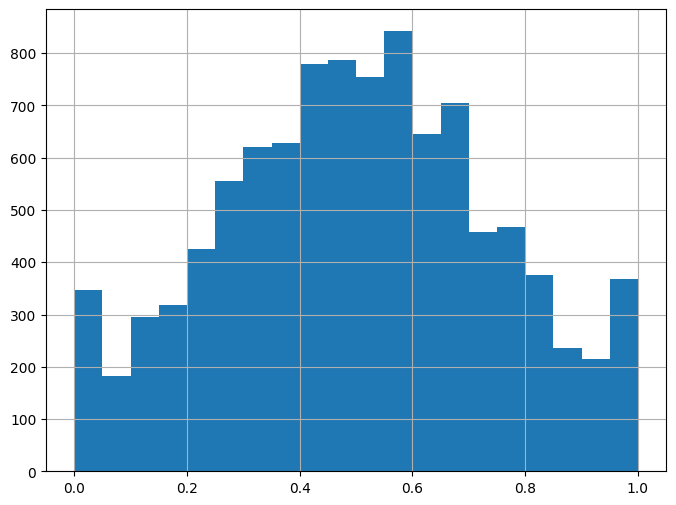

In [ ]:
data.expression.hist(bins=20, figsize=(8, 6))

In [ ]:
#@title One-hot encode the DNA
lb = LabelBinarizer()
lb.fit(list('ACGT'))

def one_hot_encode(sequence):
    return lb.transform(list(sequence))

data['encoded_sequence'] = data['sequence'].apply(one_hot_encode)
data.head()

,sequence,expression,encoded_sequence
0,CTCCGGCCCTATGCAATCGAGTTATTGCGAGTGCGTTATTGGGAAC...,0.445,"[[0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0,..."
1,ATTCAAATCTTACTTTTCAGTATAGGAGTTTCTTGCGTAAACTGCT...,0.440,"[[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0,..."
2,TTGGTCCGGGGCTGACACCCCACCCACCGAAAGAGGCTGCACCAAA...,0.665,"[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0,..."
3,TGAAGTTTGCAATAGAACCAGTCAAGATGGTTTCCCTAAAGATAGC...,0.345,"[[0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1,..."
4,TGGGGGGAAGGTTTGGCTTAGGGTACGGGGTTAACAGTTTACAACG...,0.515,"[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0,..."


In [ ]:
#@title Create train-validation-test splits

X = np.stack(data['encoded_sequence'])
y = data['expression'].values

# splitting data into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# splitting the training data further into train and validaiton(tuning) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
#@title Check the shape of the data

print('input data shape', X_train.shape)
print('label shape', y_train.shape)

input data shape (6000, 200, 4)
label shape (6000,)


In [ ]:
#@title Define a fully connected neural network

def create_simple_nn():
  input_shape = (200, 4)  # Adjust this to match your actual input shape

  simple_nn = Sequential([
      Flatten(input_shape=input_shape),   # Flatten the input
      Dense(512, activation='relu'),      # Fully connected layer with 128 units
      Dense(256, activation='relu'),       # Fully connected layer with 64 units
      Dense(1)                            # Output layer with 1 unit (for regression)
  ])

  return simple_nn

simple_nn = create_simple_nn()
simple_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 541,697
Trainable params: 541,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title Train the neural network

#compile model
simple_nn.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-1), loss='mse')
# Train the model
history = simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1024, verbose = 1)

Epoch 1/100
6/6 [==============================] - 6s 61ms/step - loss: 0.1188 - val_loss: 0.0715
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0674 - val_loss: 0.0641
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0615 - val_loss: 0.0600
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0577 - val_loss: 0.0569
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0546 - val_loss: 0.0542
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0519 - val_loss: 0.0518
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0495 - val_loss: 0.0496
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0473 - val_loss: 0.0476
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0453 - val_loss: 0.0458
Epoch 10/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0435 - val_loss: 0.0441
Epoch 11/100
6/6 [=

63/63 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Simple NN Performance')

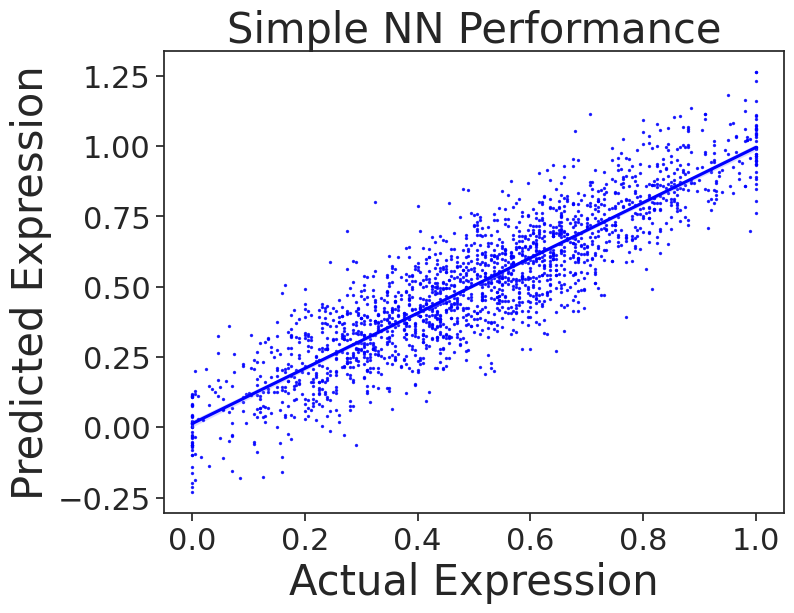

In [ ]:
#@title Test the model
y_pred = simple_nn.predict(X_test)
# Visualize performance
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred[:,0], scatter_kws={'s':2}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('Simple NN Performance', fontsize = 30)

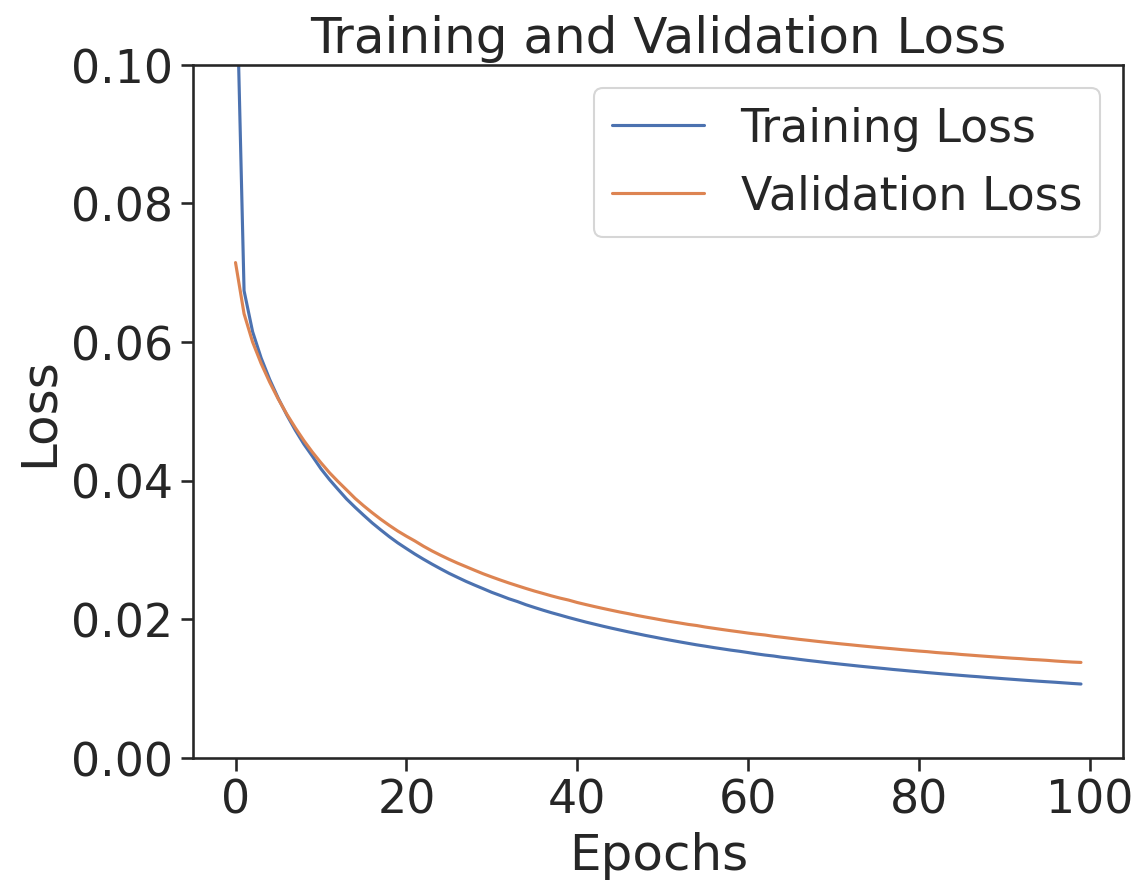

In [ ]:
#@title Check for model overfitting

sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 150, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
plt.plot(list(history.history['loss']), label='Training Loss')
# Plot validation loss
plt.plot(list(history.history['val_loss']), label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,0.1)
plt.show()

In [ ]:
#@title Using the best model from training
simple_nn = create_simple_nn()
#compile model
simple_nn.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-1), loss='mse')
# checkpoints
model_path = 'best_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# Train the model
simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1024, callbacks=callbacks_list)

Epoch 1/100
1/6 [====>.........................] - ETA: 2s - loss: 3.6838
Epoch 1: val_loss improved from inf to 0.08623, saving model to best_model.h5
6/6 [==============================] - 1s 42ms/step - loss: 0.7162 - val_loss: 0.0862
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0869
Epoch 2: val_loss improved from 0.08623 to 0.06861, saving model to best_model.h5
6/6 [==============================] - 0s 20ms/step - loss: 0.0749 - val_loss: 0.0686
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0664
Epoch 3: val_loss improved from 0.06861 to 0.06165, saving model to best_model.h5
6/6 [==============================] - 0s 19ms/step - loss: 0.0640 - val_loss: 0.0617
Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0607
Epoch 4: val_loss improved from 0.06165 to 0.05779, saving model to best_model.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.0590 - val_loss: 0.0578
Epoch 5/100
1/6 [====>..............

63/63 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Simple NN Performance')

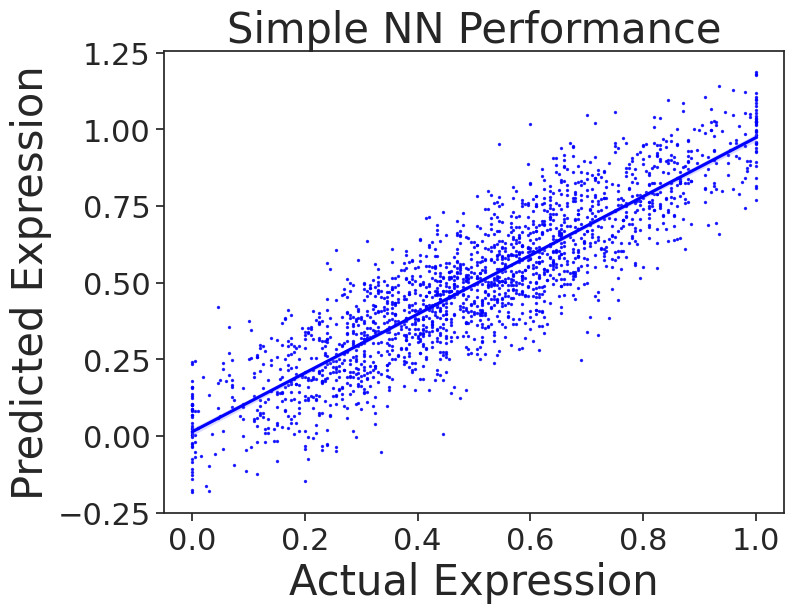

In [ ]:
# load weights
simple_nn.load_weights('best_model.h5')
y_pred = simple_nn.predict(X_test)

# Visualize performance
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred[:,0], scatter_kws={'s':2}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('Simple NN Performance', fontsize = 30)

In [ ]:
#@title Change model hyperparameters for better performance

#@title Define a fully connected neural network

def create_simple_nn():
  input_shape = (200, 4)  # Adjust this to match your actual input shape

  simple_nn = Sequential([
      Flatten(input_shape=input_shape),   # Flatten the input
      Dense(256, activation='relu'),      # Fully connected layer with 128 units
      Dense(128, activation='relu'),       # Fully connected layer with 64 units
      Dense(1)                            # Output layer with 1 unit (for regression)
  ])

  return simple_nn

simple_nn = create_simple_nn()
simple_nn.summary()

#compile model
simple_nn.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4), loss='mse')
# checkpoints
model_path = 'best_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Train the model
simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1024, callbacks=callbacks_list)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               205056    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 238,081
Trainable params: 238,081
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/6 [====>.........................] - ETA: 7s - loss: 0.8372
Epoch 1: val_loss improved from inf to 0.17483, saving model to best_model.h5
6/6 [==============================] - 2s 42ms/step - loss: 0.4326 - val_loss: 0.1748
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 0.1710
Epoch 2: val_loss improved from 0.17483 to 0.06203, saving model to best_model.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.0830 - val_loss: 0.0620
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0579
Epoch 3: val_loss improved from 0.06203 to 0.04093, saving model to best_model.h5
6/6 [==============================] - 0s 20ms/step - loss: 0.0361 - val_loss: 0.0409
Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0389
Epoch 4: val_loss improved from 0.04093 to 0.02443, saving model to best_model.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.0239 - val_loss: 0.0244
Epoch 5/100
1/6 [====>..............

63/63 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Simple NN Performance With Improved choice of Hyperparameters')

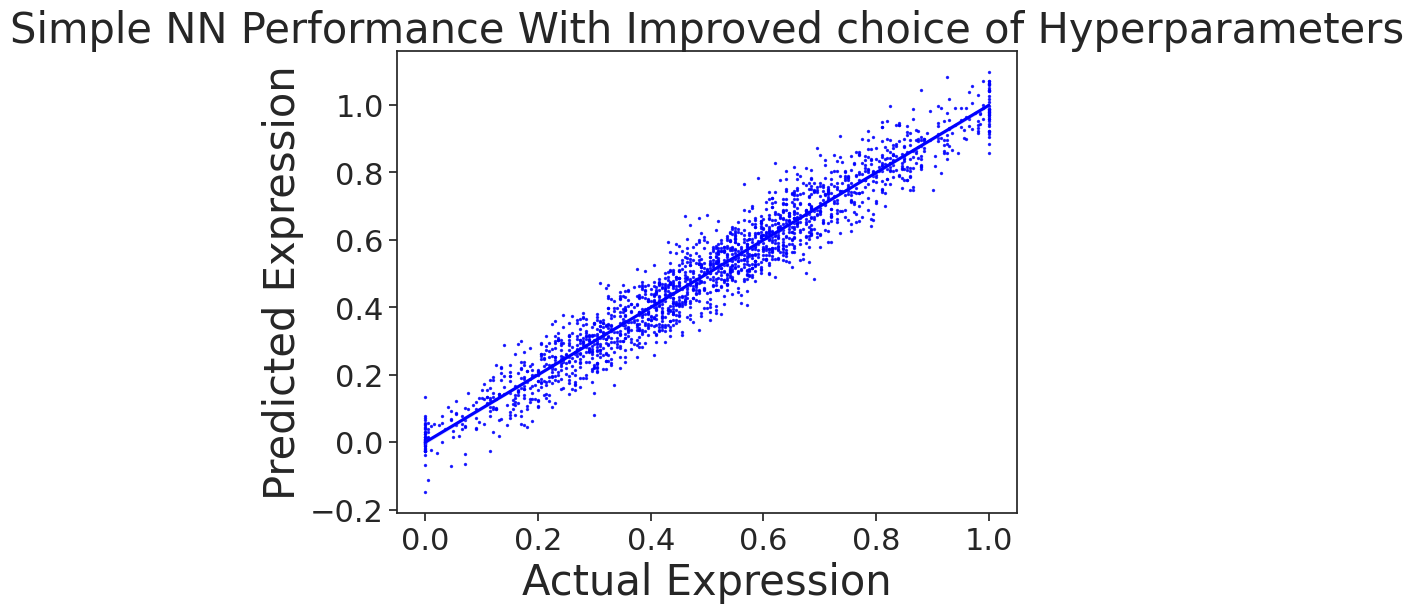

In [ ]:
#load best model weights
simple_nn.load_weights('best_model.h5')
# Test the model
y_pred = simple_nn.predict(X_test)
# Visualize performance
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred[:,0], scatter_kws={'s':2}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('Simple NN Performance With Improved choice of Hyperparameters', fontsize = 30)

In [ ]:
#@title (Optional) Define custom loss functions better suited for your problem
from tensorflow.keras import backend as K

def pearson_r_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)

simple_nn = create_simple_nn()
simple_nn.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4), loss=pearson_r_loss)

# checkpoints
model_path = 'best_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss',
                                             verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Train the model
simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1024, callbacks=callbacks_list)

Epoch 1/100
1/6 [====>.........................] - ETA: 7s - loss: 0.9973
Epoch 1: val_loss improved from inf to 0.01189, saving model to best_model.h5
6/6 [==============================] - 2s 52ms/step - loss: 0.2193 - val_loss: 0.0119
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0119
Epoch 2: val_loss improved from 0.01189 to 0.00460, saving model to best_model.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0042
Epoch 3: val_loss improved from 0.00460 to 0.00259, saving model to best_model.h5
6/6 [==============================] - 0s 21ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0025
Epoch 4: val_loss improved from 0.00259 to 0.00201, saving model to best_model.h5
6/6 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/100
1/6 [====>..............

63/63 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Simple NN Performance With Pearson R correlation')

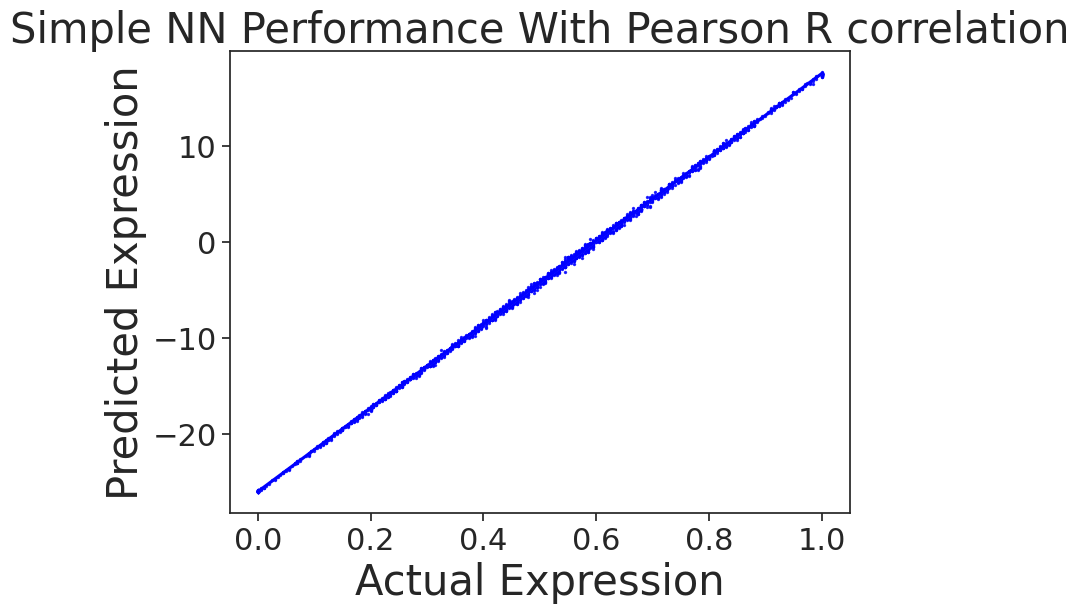

In [ ]:
simple_nn.load_weights('best_model.h5')
# Test the model
y_pred = simple_nn.predict(X_test)

# Visualize performance
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred[:,0], scatter_kws={'s':2}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('Simple NN Performance With Pearson R correlation', fontsize = 30)

In [ ]:
#@title Train a CNN architecture
def create_CNN_model():
  model = Sequential([
    Conv1D(filters=32, kernel_size=17, activation='relu', input_shape=(X_train.shape[1], 4)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=17, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
  ])
  return model
CNN_Model = create_CNN_model()
CNN_Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 184, 32)           2208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 76, 64)            34880     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 38, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2432)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.2177
Epoch 1: val_loss improved from inf to 0.08918, saving model to best_CNN_model.h5
6/6 [==============================] - 5s 327ms/step - loss: 0.2177 - val_loss: 0.0892
Epoch 2/100
5/6 [========================>.....] - ETA: 0s - loss: 0.0496
Epoch 2: val_loss improved from 0.08918 to 0.03862, saving model to best_CNN_model.h5
6/6 [==============================] - 0s 29ms/step - loss: 0.0478 - val_loss: 0.0386
Epoch 3/100
5/6 [========================>.....] - ETA: 0s - loss: 0.0190
Epoch 3: val_loss improved from 0.03862 to 0.01073, saving model to best_CNN_model.h5
6/6 [==============================] - 0s 31ms/step - loss: 0.0179 - val_loss: 0.0107
Epoch 4/100
4/6 [===================>..........] - ETA: 0s - loss: 0.0057
Epoch 4: val_loss improved from 0.01073 to 0.00464, saving model to best_CNN_model.h5
6/6 [==============================] - 0s 31ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 5/100
5/6 [==

Text(0.5, 1.0, 'CNN Model Performance')

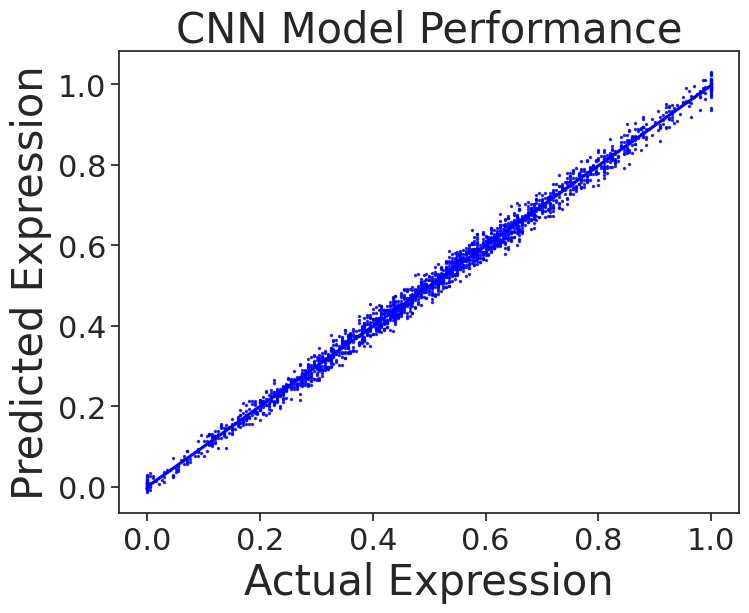

In [ ]:
# checkpoints
CNN_Model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4), loss='mse')
model_path = 'best_CNN_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss',
                                             verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Train the model
CNN_Model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1024, callbacks=callbacks_list)

CNN_Model.load_weights('best_CNN_model.h5')
# Test the model
y_pred = CNN_Model.predict(X_test)

# Visualize performance
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 100, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred[:,0], scatter_kws={'s':2}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('CNN Model Performance', fontsize = 30)

In [ ]:
#@title Train a linear regressor for comparison
reg = LinearRegression().fit(X_train.reshape(X_train.shape[0], -1), y_train)
# Test the linear regressor
y_pred_reg = reg.predict(X_test.reshape(X_test.shape[0], -1))

Text(0.5, 1.0, 'Linear Regression Model Performance')

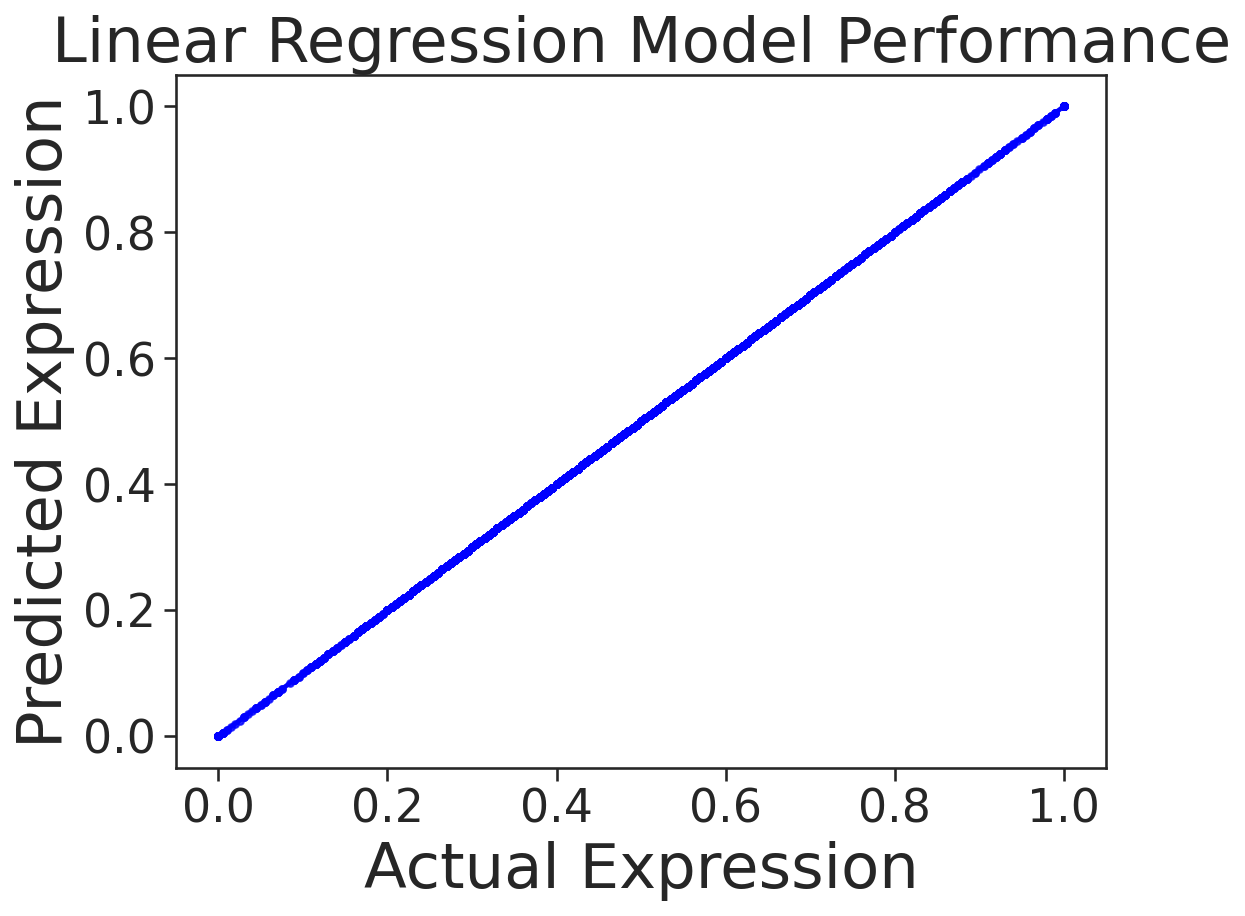

In [ ]:
sns.set(font_scale=2)
fig=plt.figure(figsize=(8, 6), dpi= 150, facecolor='w', edgecolor='k')
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30})
sns.regplot(x=y_test, y=y_pred_reg, scatter_kws={'s':10}, marker='o', color='blue')
plt.xlabel('Actual Expression', fontsize = 30)
plt.ylabel('Predicted Expression', fontsize = 30)
plt.title('Linear Regression Model Performance', fontsize = 30)

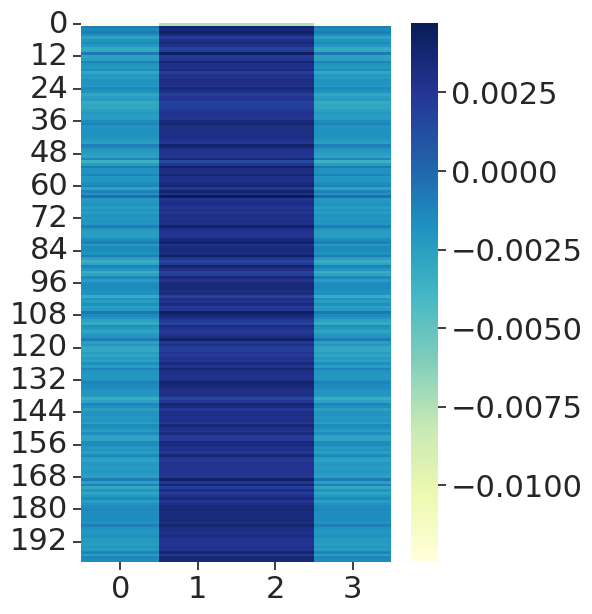

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = np.reshape(reg.coef_, (200,4))

plt.figure(figsize=(5, 7), dpi = 100)
sns.heatmap(data, cmap="YlGnBu")
plt.show()
